Import library

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from pickle import dump, load
from sklearn.metrics import r2_score

C:\Users\Hossein\AppData\Local\Temp\ipykernel_11848\3676625521.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Create data or import data

In [2]:
x = np.array([23, 30, 40, 60, 70, 80, 90, 100])
y = np.array([25, 20, 15, 7, 4, 3, 1.5, 0])
df = pd.DataFrame({'x': x, 'y': y})

Drow plot

<function matplotlib.pyplot.show(close=None, block=None)>

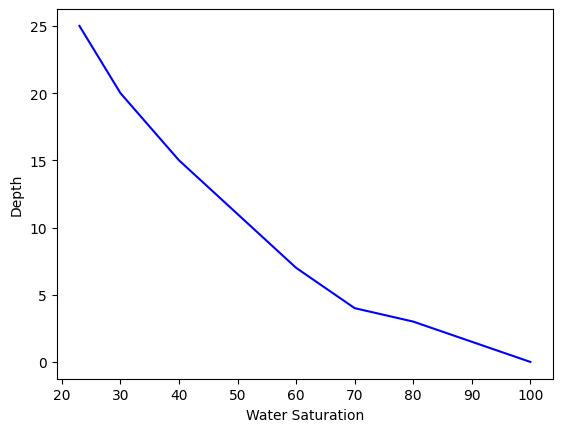

In [3]:
plt.plot(x, y, color="blue")
plt.xlabel('Water Saturation')
plt.ylabel('Depth')
plt.show

choose range & create end data

In [4]:
range_min, range_max= 23, 101
dftest = []

for i in range(range_min, range_max):
    dftest.append(i)
    
dftestpd = pd.DataFrame({'x' : dftest})

Train & save model

In [8]:
r2, r2_old, n=0, 0, 0
x_ = df["x"].values.reshape(-1,1)
y_ = df["y"].values

while r2 <=0.997:
    #create and fit model
    test_model= SymbolicRegressor(population_size=1000, generations=20, function_set=["add", "sub", "mul", "div"], metric="rmse")
    test_model.fit(x_, y_)

    #pledect and calculate r2
    y_test= test_model.predict(pd.DataFrame({'x': x}))
    r2= r2_score(y_true=y, y_pred=y_test)
    if r2 > r2_old:

        #check folder
        if n==0:
            path= 'model'
            if not os.path.exists(path):
                os.mkdir(path)
            else:
                print("The folder already exists.")

        #create and save model in file
        with open("model/model.pkl", "wb") as file:
            dump(test_model, file)
        model = test_model
    r2_old= r2
    
    n+=1
    print(f'round:{n}\nR2: {round(r2, 3)}\n' + ('-'*40))
    if n==20:
        break

round:1
R2: 0.995
----------------------------------------
round:2
R2: 0.958
----------------------------------------
round:3
R2: 0.947
----------------------------------------
round:4
R2: 0.991
----------------------------------------
round:5
R2: 0.976
----------------------------------------
round:6
R2: 0.989
----------------------------------------
round:7
R2: 0.972
----------------------------------------
round:8
R2: 0.989
----------------------------------------
round:9
R2: 0.993
----------------------------------------
round:10
R2: 0.996
----------------------------------------
round:11
R2: 0.996
----------------------------------------
round:12
R2: 0.992
----------------------------------------
round:13
R2: 0.997
----------------------------------------
round:14
R2: 0.962
----------------------------------------
round:15
R2: 0.979
----------------------------------------
round:16
R2: 0.947
----------------------------------------
round:17
R2: 0.927
------------------------------

Load model

In [9]:
with open("exmple_model (2).pkl", "rb") as file:
    model = load(file)

Predict data

In [6]:
y_pred = model.predict(dftestpd)

Show end plot

<function matplotlib.pyplot.show(close=None, block=None)>

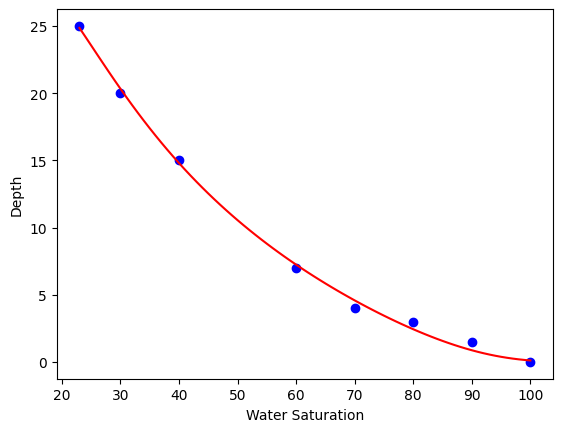

In [7]:
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(dftestpd, y_pred, color="red")
plt.xlabel('Water Saturation')
plt.ylabel('Depth')
plt.show

Calculate R² score

In [12]:
y_test= model.predict(pd.DataFrame({'x': x}))

print(f'R²: {r2_score(y_true=y, y_pred=y_test)}')

R²: 0.998037636853373
